In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ft
import cv2 as cv
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
from keras import Sequential

2023-10-14 00:16:42.797696: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 00:16:42.850868: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 00:16:43.803388: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
train_dir = 'Images_dataset/Vehical_color/train/'
test_dir = 'Images_dataset/Vehical_color/test/'
val_dir = 'Images_dataset/Vehical_color/val/'

In [7]:
l,w = 60,60
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [8]:
train_df = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(l,w),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True
)

val_df = val_gen.flow_from_directory(
    directory=val_dir,
    target_size=(l,w),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_df = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(l,w),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [9]:
nb_class = 15

In [10]:
train_df.class_indices.keys()
val_df.class_indices.keys()

dict_keys(['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow'])

### CNN 

In [12]:
model = Sequential()

model.add(Conv2D(16,(3,3),strides=1,padding='valid',activation='relu',input_shape=(l,w,3)))
model.add(Conv2D(16,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(32,(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(32,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(64,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=nb_class,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 58, 58, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                 

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Acc'])

In [14]:
hist = model.fit(train_df,batch_size=30,epochs=10,validation_data=val_df)

Epoch 1/10
  1/228 [..............................] - ETA: 8:29 - loss: 2.7102 - Acc: 0.0312

2023-10-14 00:23:56.631757: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27205632 exceeds 10% of free system memory.
2023-10-14 00:23:56.631895: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27205632 exceeds 10% of free system memory.
2023-10-14 00:23:56.654288: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24920064 exceeds 10% of free system memory.
2023-10-14 00:23:56.654452: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24920064 exceeds 10% of free system memory.
2023-10-14 00:23:56.681992: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28901376 exceeds 10% of free system memory.


228/228 [==============================] - 141s 612ms/step - loss: 1.8040 - Acc: 0.3532 - val_loss: 1.3916 - val_Acc: 0.5206
Epoch 2/10
228/228 [==============================] - 48s 210ms/step - loss: 1.1441 - Acc: 0.5967 - val_loss: 0.9921 - val_Acc: 0.6671
Epoch 3/10
228/228 [==============================] - 48s 209ms/step - loss: 0.9158 - Acc: 0.6667 - val_loss: 0.8708 - val_Acc: 0.6839
Epoch 4/10
228/228 [==============================] - 48s 211ms/step - loss: 0.8072 - Acc: 0.7094 - val_loss: 0.8217 - val_Acc: 0.6955
Epoch 5/10
228/228 [==============================] - 49s 213ms/step - loss: 0.7423 - Acc: 0.7350 - val_loss: 0.7250 - val_Acc: 0.7310
Epoch 6/10
228/228 [==============================] - 56s 244ms/step - loss: 0.6810 - Acc: 0.7538 - val_loss: 0.6634 - val_Acc: 0.7535
Epoch 7/10
228/228 [==============================] - 50s 220ms/step - loss: 0.6758 - Acc: 0.7515 - val_loss: 0.6740 - val_Acc: 0.7619
Epoch 8/10
228/228 [==============================] - 52s 229ms/s

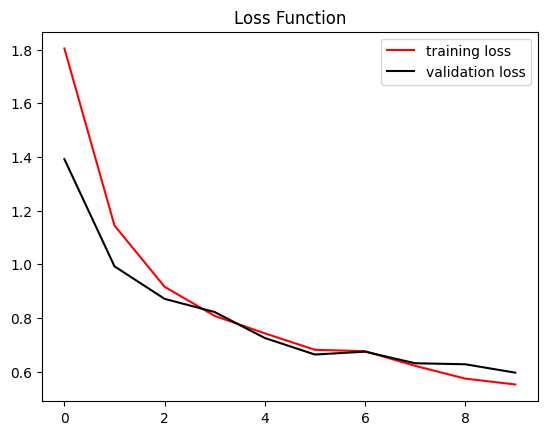

In [15]:
plt.title('Loss Function')
sns.lineplot(hist.history['loss'],label = 'training loss',c='r')
sns.lineplot(hist.history['val_loss'],label = 'validation loss',c='black')
plt.show()

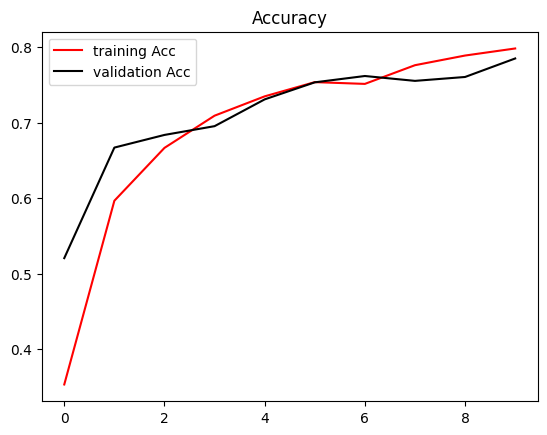

In [16]:
plt.title('Accuracy')
sns.lineplot(hist.history['Acc'],label = 'training Acc',c='r')
sns.lineplot(hist.history['val_Acc'],label = 'validation Acc',c='black')
plt.show()

In [17]:
y_pred = model.predict(test_df,batch_size=32)
y_pred = np.argmax(y_pred,axis=1)
mat = confusion_matrix(test_df.classes,y_pred)

49/49 [==============================] - 10s 205ms/step


<Axes: >

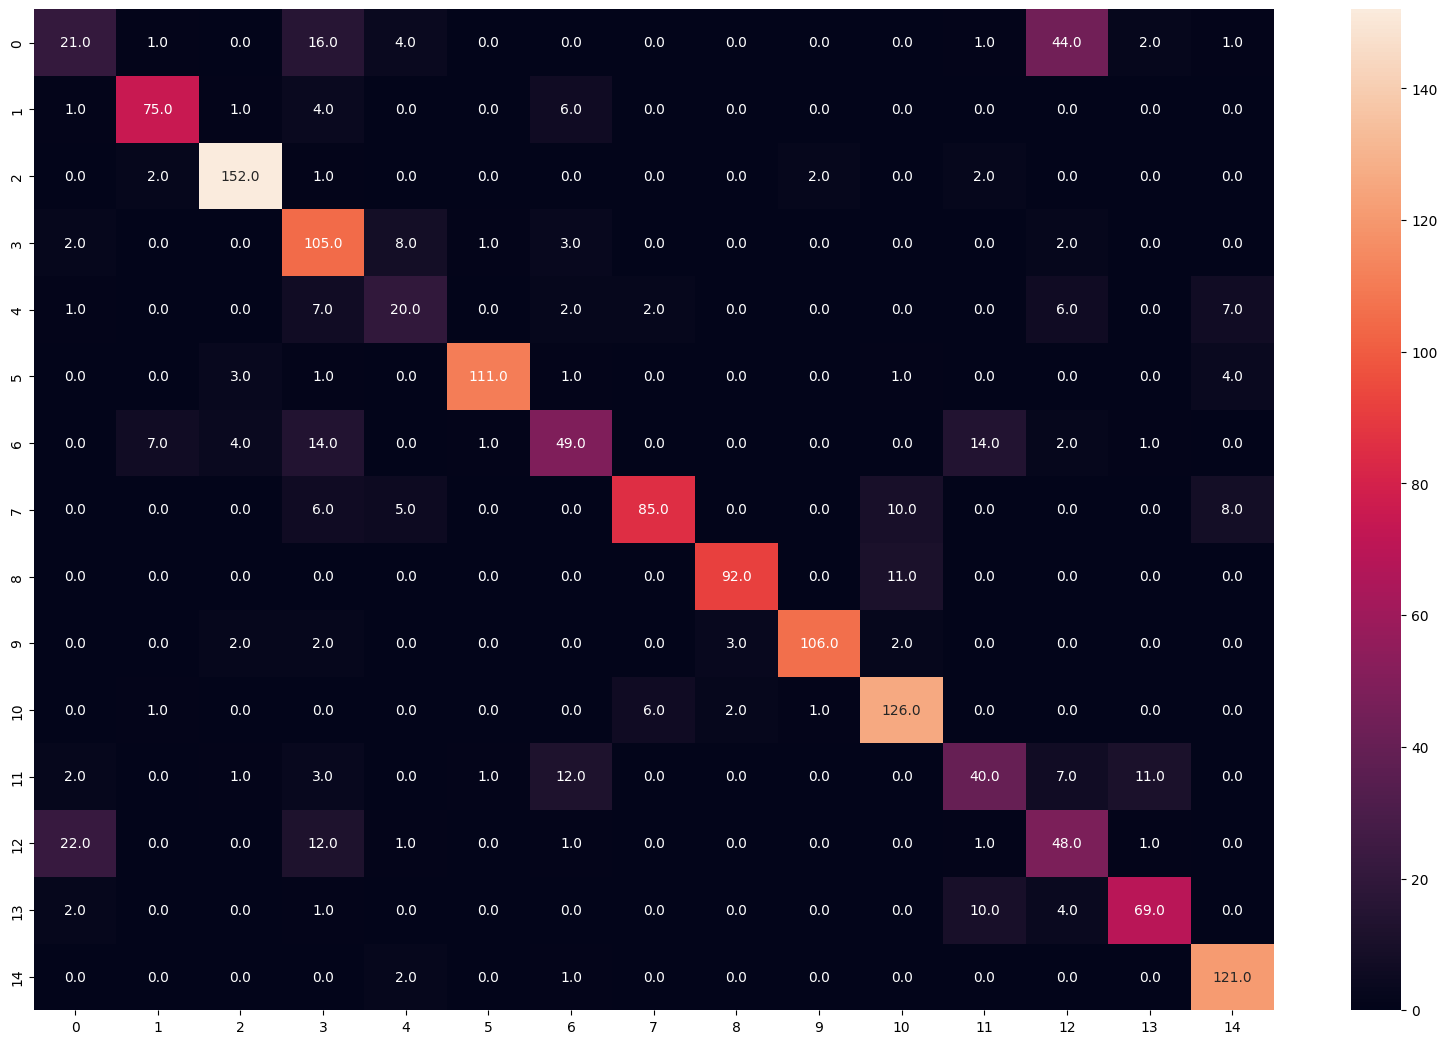

In [18]:
plt.figure(figsize=(20,13))
sns.heatmap(mat,annot=True,fmt='.1f')

In [55]:
report = classification_report(test_df.classes, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.41      0.67      0.51        90
           1       0.88      0.68      0.77        87
           2       0.95      0.93      0.94       159
           3       0.65      0.69      0.67       121
           4       0.46      0.42      0.44        45
           5       0.99      0.92      0.95       121
           6       0.60      0.51      0.55        92
           7       0.70      0.92      0.80       114
           8       0.93      0.92      0.93       103
           9       0.95      0.93      0.94       115
          10       0.93      0.73      0.81       136
          11       0.62      0.58      0.60        77
          12       0.47      0.33      0.38        86
          13       0.84      0.86      0.85        86
          14       0.89      0.98      0.93       124

    accuracy                           0.77      1556
   macro avg       0.75      0.74      0.74      1556
weighted avg       0.79   

In [164]:
import cv2
import numpy as np
import tensorflow as tf

# Load your pretrained CNN model
model = model

# Load and preprocess the image
image = cv2.imread('/home/junaidulhassan/Pictures/Screenshots/Screenshot from 2023-08-12 02-21-57.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(image, (80,80))
input_image = input_image / 255.0  # Normalize

# Make predictions
predictions = model.predict(np.expand_dims(input_image, axis=0))

1/1 [==============================] - 0s 28ms/step


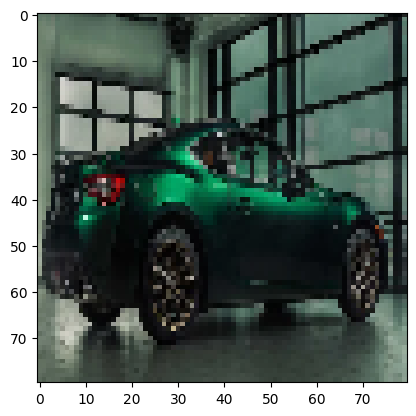

In [165]:
plt.imshow(input_image)

In [166]:
predictions = np.argmax(predictions,axis=1)
predictions = predictions[0]

In [167]:
label = list(test_df.class_indices.keys())

In [168]:
print('The Color of the car is ',label[predictions])

The Color of the car is  green


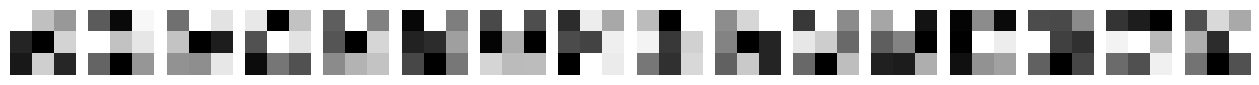

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained CNN model
# Extract the filters from the first convolutional layer
first_conv_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        first_conv_layer = layer
        break

if first_conv_layer is None:
    raise ValueError("No convolutional layer found in the model.")

filters, _ = first_conv_layer.get_weights()

# Prepare a figure to display the first layer filters
num_filters = filters.shape[3]
plt.figure(figsize=(num_filters, 1))

# Display each filter
for i in range(num_filters):
    plt.subplot(1, num_filters, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')  # Display the first channel of the filter
    plt.axis('off')

plt.show()

In [162]:
filt = filters[:,:,0,14]
img = cv2.filter2D(image,-1,filt)

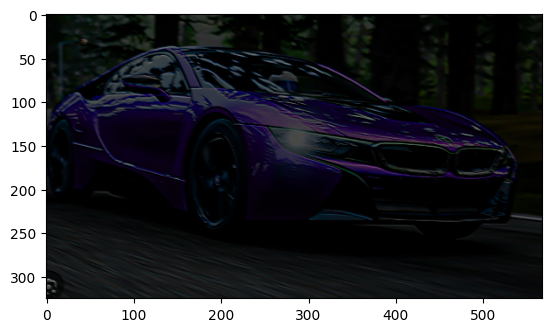

In [163]:
plt.imshow(img)